In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('wine.xls',names=['Type','Alcohol','Malic acid', 'Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
df.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [4]:
df.isna().sum()

Type                            0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [5]:
df.dtypes

Type                              int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [6]:
df.Type = df.Type.astype('object')
df.Type.dtype

dtype('O')

In [7]:
df.skew()

Type                            0.107431
Alcohol                        -0.051482
Malic acid                      1.039651
Ash                            -0.176699
Alcalinity of ash               0.213047
Magnesium                       1.098191
Total phenols                   0.086639
Flavanoids                      0.025344
Nonflavanoid phenols            0.450151
Proanthocyanins                 0.517137
Color intensity                 0.868585
Hue                             0.021091
OD280/OD315 of diluted wines   -0.307285
Proline                         0.767822
dtype: float64

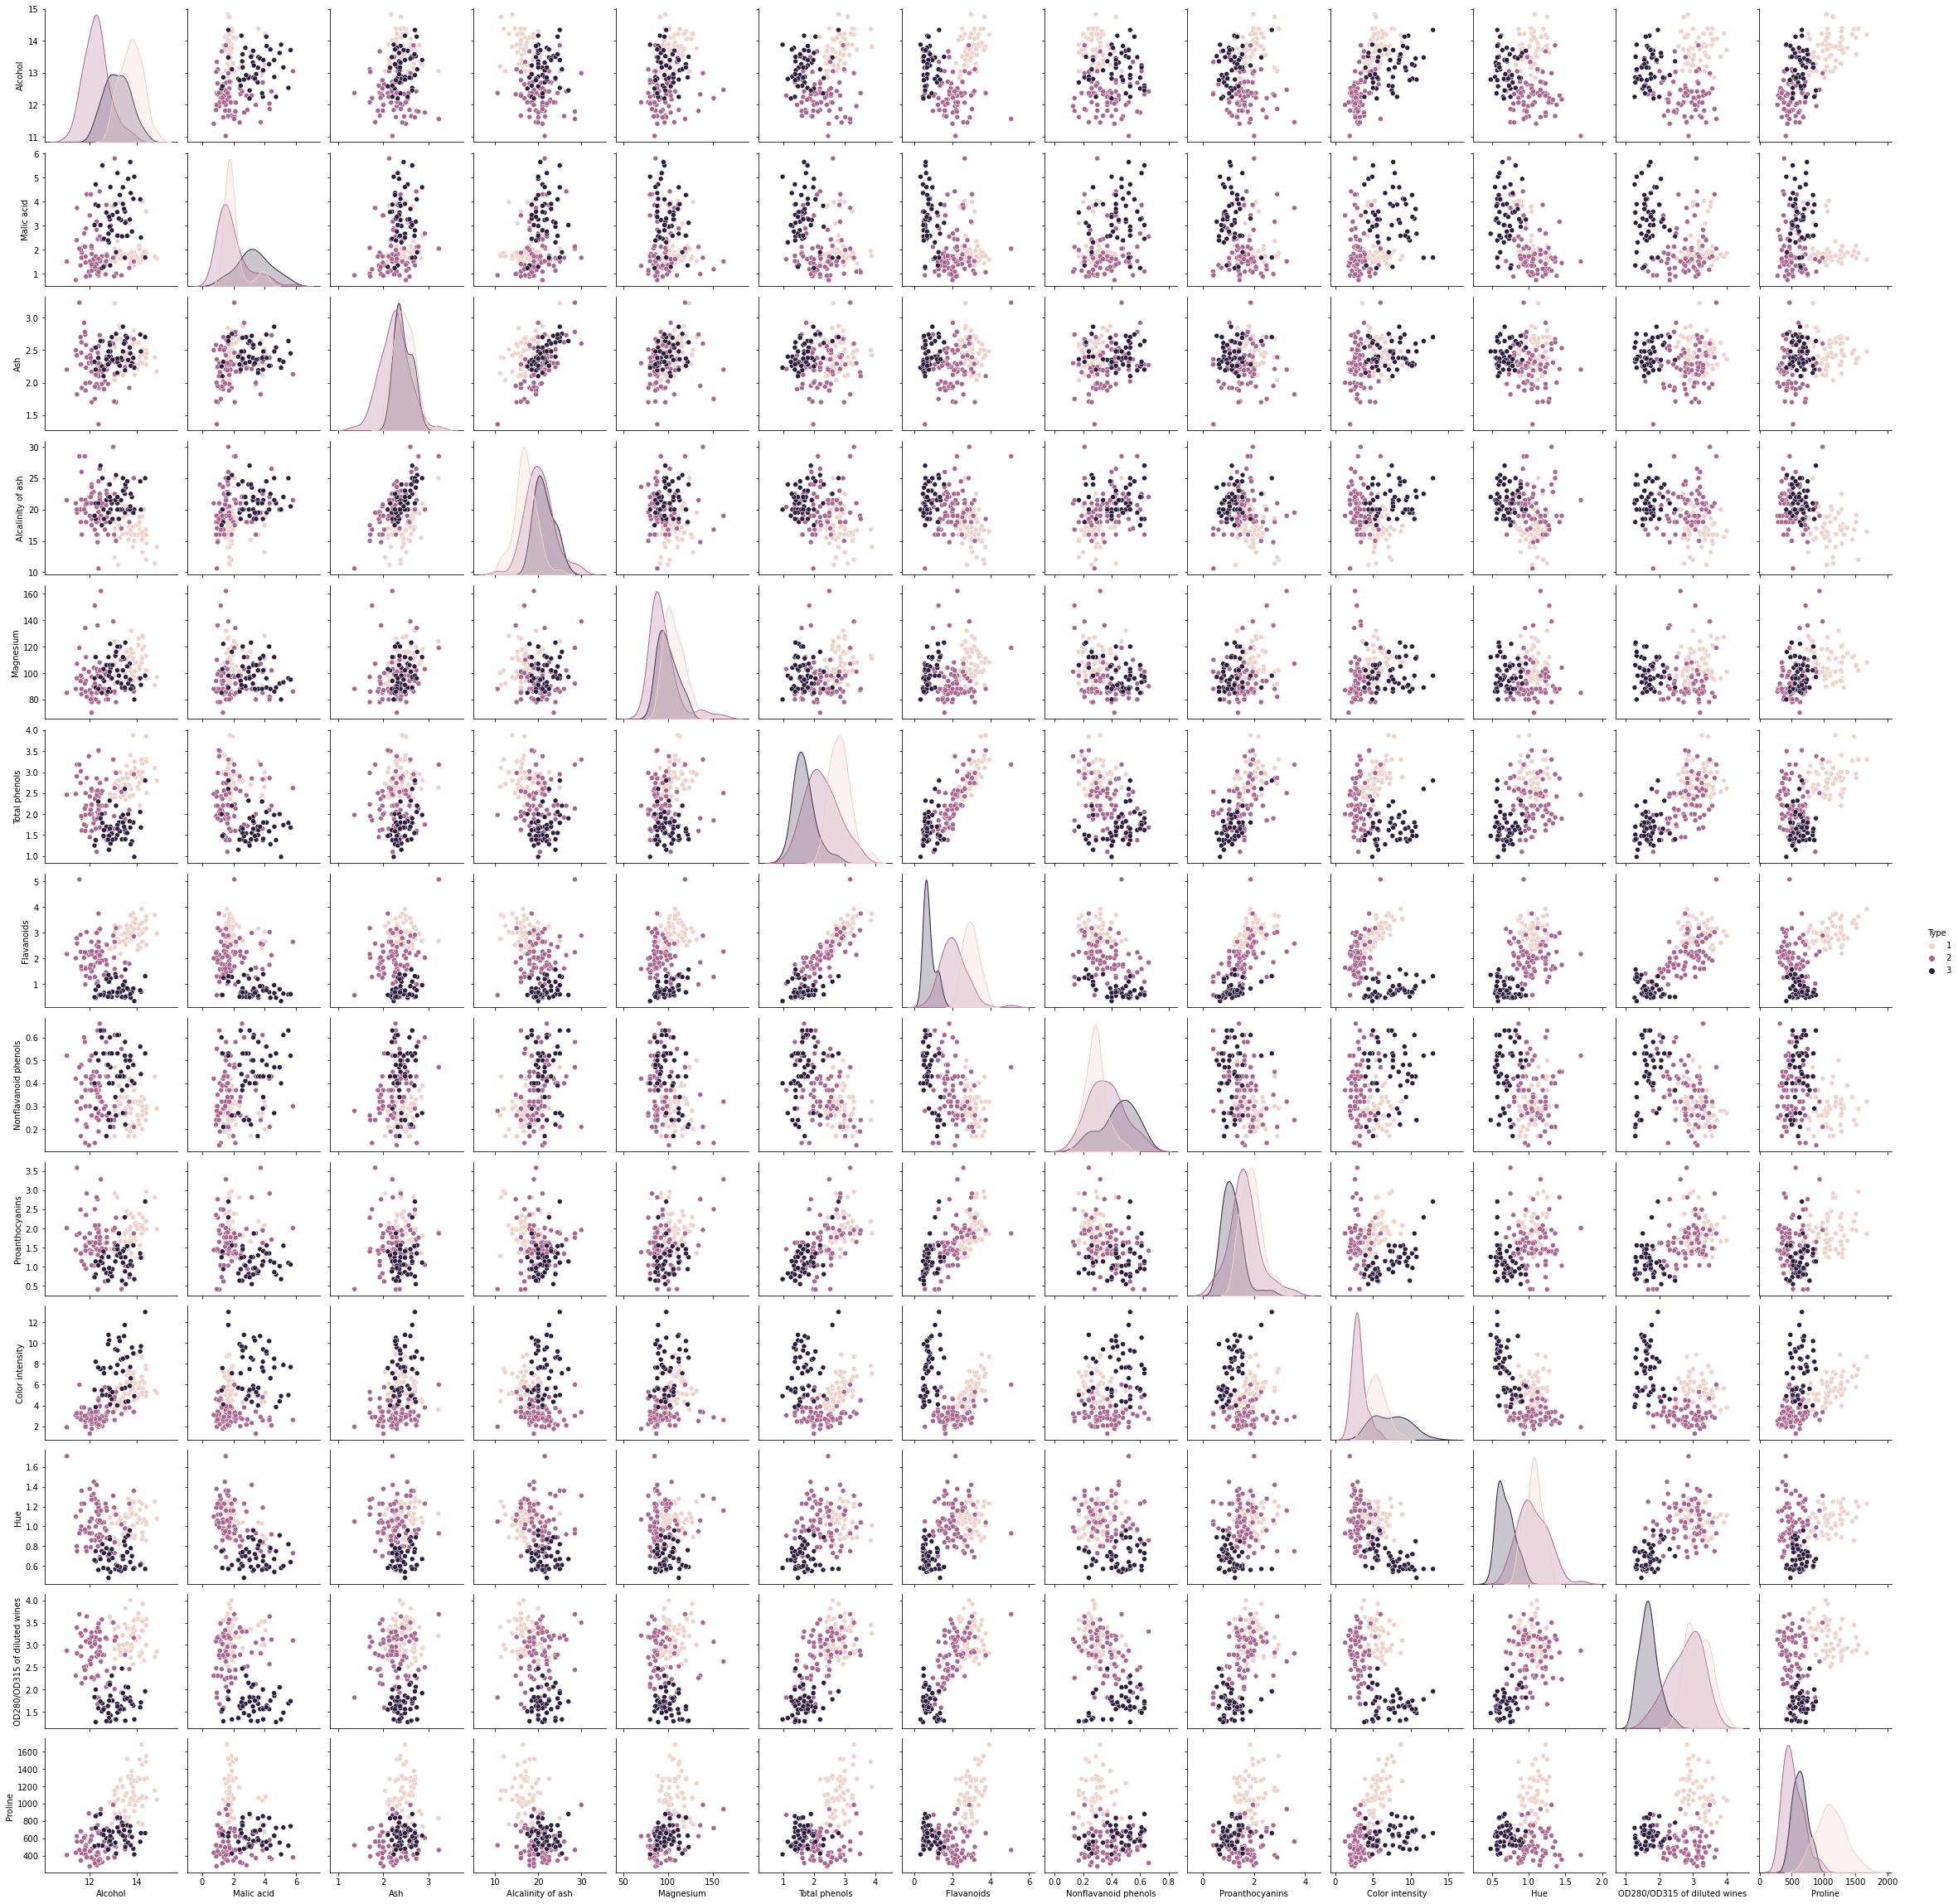

In [8]:
sns.pairplot(df,diag_kind='kde',hue='Type')
plt.show()

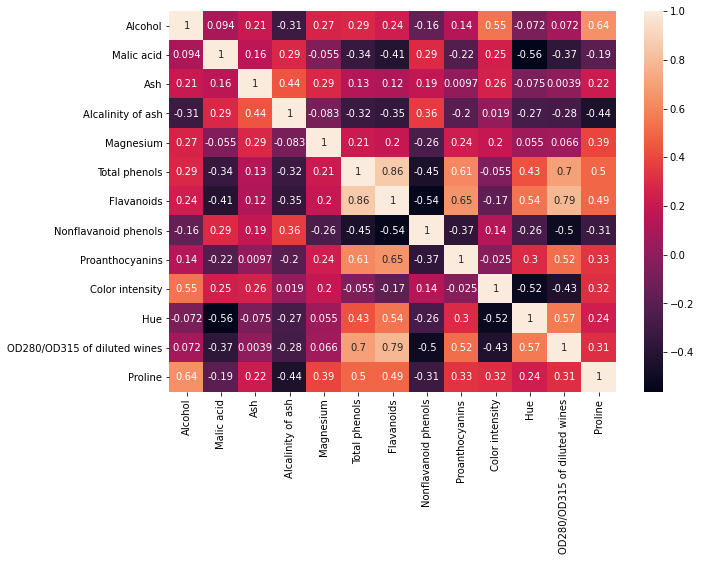

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
x = df.drop('Type',1)
y = df.Type

In [11]:
ss = StandardScaler()
x_scaled = pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x_scaled.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Kmeans

In [12]:
err = []
for i in range(1,10):
    model = KMeans(i)
    model.fit(x_scaled)
    model.inertia_
    err.append(model.inertia_)

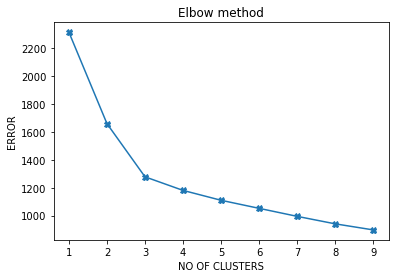

In [13]:
plt.plot(range(1,10),err,marker='X')
plt.xlabel('NO OF CLUSTERS')
plt.ylabel('ERROR')
plt.title('Elbow method')
plt.show()

In [14]:
for clusters in range(2,10):
    model  = KMeans(clusters)
    model.fit(x_scaled)
    sil_score = silhouette_score(x_scaled,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)

silhouette_score for 2 clusters: 0.25931695553182543
silhouette_score for 3 clusters: 0.2848589191898987
silhouette_score for 4 clusters: 0.25173343011696475
silhouette_score for 5 clusters: 0.2306166819222654
silhouette_score for 6 clusters: 0.23567871062181248
silhouette_score for 7 clusters: 0.1870116078423536
silhouette_score for 8 clusters: 0.20114752380037468
silhouette_score for 9 clusters: 0.15091673580221024


Inference : as observed the elbow plot and silhoutte score gives us 3 as recommended no of clusters

Kmeans model building

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_scaled)
df_k = x_scaled.copy()
df_k['lables_k'] = kmeans.labels_
df_k.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,lables_k
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


In [17]:
link=['single','complete','average','ward','centroid']
for l in link:
    Z = linkage(x_scaled, method = l)
    c, coph_dist = cophenet(Z, pdist(x_scaled))
    print('Cophenetic value for ', l , 'is: ', c)

Cophenetic value for  single is:  0.5436231199247621
Cophenetic value for  complete is:  0.5916829459078577
Cophenetic value for  average is:  0.7590840545998375
Cophenetic value for  ward is:  0.6623487206613261
Cophenetic value for  centroid is:  0.7565245602161739


professor

c = [2,3,4] link=['single','complete','average','ward'] score= [] for i in c: for l in link: cluster=AgglomerativeClustering(n_clusters=i,linkage=l) cluster.fit(X_sc) label = cluster.labels_ score = silhouette_score(X_sc,label,random_state=10) print('The score of', i ,'clusters and',l,'linkage is ',score)

print('\n')
dendogram evaluation for choosing clusters

complete linkage

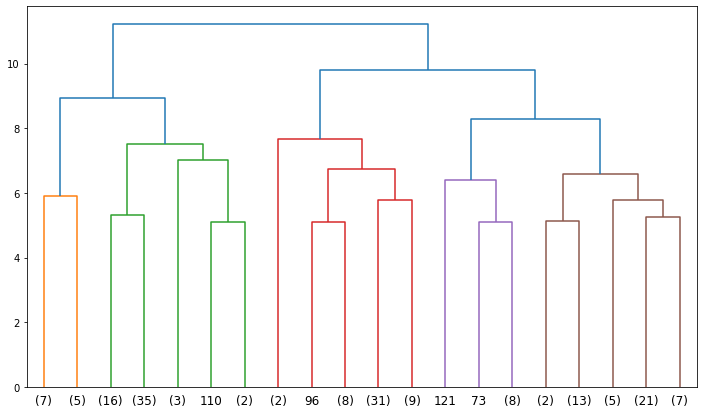

In [18]:
plt.figure(figsize=(12,7))
z_complete = linkage(x_scaled,method='complete')
dendrogram(z_complete,truncate_mode='lastp',p=20)
plt.show()

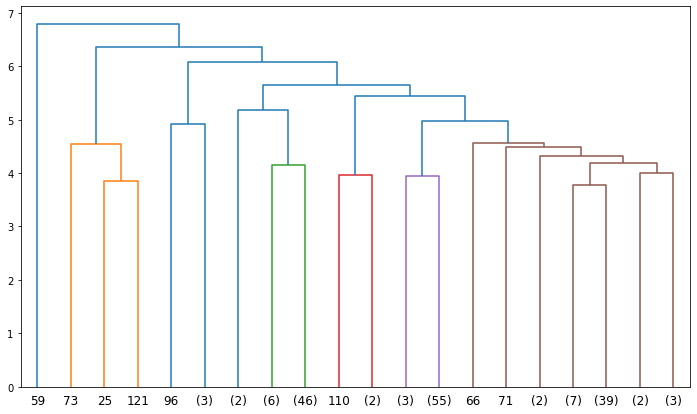

In [19]:
plt.figure(figsize=(12,7))
z_avg = linkage(x_scaled,method='average')
dendrogram(z_avg,truncate_mode='lastp',p=20)
plt.show()

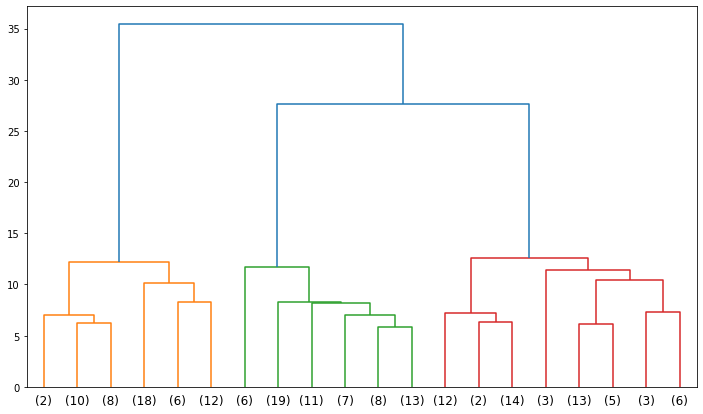

In [20]:
plt.figure(figsize=(12,7))
z_ward = linkage(x_scaled,method='ward')
dendrogram(z_ward,truncate_mode='lastp',p=20)
plt.show()

### Inference : out of all the three best linkage recommendations, ward serve the purpose here considering dendogramic height and separtion of clusters

AgglomerativeClustering with ward linkage and with 3 clusters

In [21]:
agg = AgglomerativeClustering(n_clusters=3,linkage='ward')
agg.fit(x_scaled)
labels_h = agg.labels_

Inference : There is claer separation identified by the model, lets analyse further to check the efficiency

In [22]:
df_h = x_scaled.copy()
df_h['Lables_h'] = labels_h
df_h.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Lables_h
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


Let's check the data frames which we got with kmeans and aggleromative

Original dataframe

In [24]:
df.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Kmeans labelled dataframe

In [25]:
df_k.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,lables_k
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


AgglomerativeClustering labelled dataframe

In [26]:
df_h.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Lables_h
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


Plot the data for observing separations

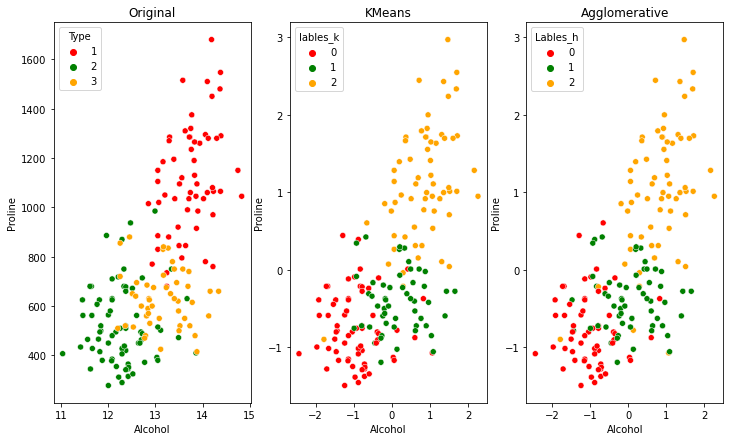

In [27]:
plt.rcParams['figure.figsize'] = (12,7)
plt.subplot(1,3,1)
plt.title('Original')
sns.scatterplot(x='Alcohol',y='Proline',hue='Type',data=df,palette=['red','green','orange'])
plt.subplot(1,3,2)
plt.title('KMeans')
sns.scatterplot(x='Alcohol',y='Proline',hue='lables_k',data=df_k,palette=['red','green','orange'])
plt.subplot(1,3,3)
plt.title('Agglomerative')
sns.scatterplot(x='Alcohol',y='Proline',hue='Lables_h',data=df_h,palette=['red','green','orange'])
plt.show()

## model Building

Decision tree with Kmeans

In [28]:
x = df_k.drop('lables_k',axis=1)
y = df_k.lables_k
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [29]:
dt = DecisionTreeClassifier()
model_agg = dt.fit(x_train,y_train)
ypred_k_agg = model_agg.predict(x_test)
print('accuracy_score of the model is ',accuracy_score(y_test,ypred_k_agg))
print('classification_report of the model is')
print(classification_report(y_test,ypred_k_agg))

accuracy_score of the model is  0.8888888888888888
classification_report of the model is
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.71      1.00      0.83        10
           2       1.00      1.00      1.00        10

    accuracy                           0.89        36
   macro avg       0.90      0.92      0.90        36
weighted avg       0.92      0.89      0.89        36



Decision tree with AgglomerativeClustering

In [30]:
x = df_h.drop('Lables_h',axis=1)
y = df_h.Lables_h
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [31]:
dt = DecisionTreeClassifier()
model_agg = dt.fit(x_train,y_train)
ypred_h_agg = model_agg.predict(x_test)
print('accuracy_score of the model is ',accuracy_score(y_test,ypred_h_agg))
print('classification_report of the model is')
print(classification_report(y_test,ypred_h_agg))

accuracy_score of the model is  0.8333333333333334
classification_report of the model is
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.91      0.77      0.83        13
           2       0.91      0.91      0.91        11

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.84        36
weighted avg       0.84      0.83      0.84        36



Inference: we could confirm that kmeans separartion gives us better result

## PCA

In [32]:
pca = PCA()
pca_df = pca.fit(x_scaled)
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [33]:
np.cumsum(pca.explained_variance_ratio_)*100

array([ 36.1988481 ,  55.40633836,  66.52996889,  73.59899908,
        80.16229276,  85.09811607,  89.3367954 ,  92.01754435,
        94.23969775,  96.16971684,  97.90655253,  99.20478511,
       100.        ])

In [34]:
pca = PCA(n_components=10)
pca10 = pca.fit_transform(x_scaled)
pca10_df = pd.DataFrame(pca10,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
pca10_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366


Inferenc : Here we got the best 10 principal components, lets go and build model

Kmeans with PCA

In [35]:
err = []
for i in range(1,10):
    model = KMeans(i)
    model.fit(pca10_df)
    model.inertia_
    err.append(model.inertia_)

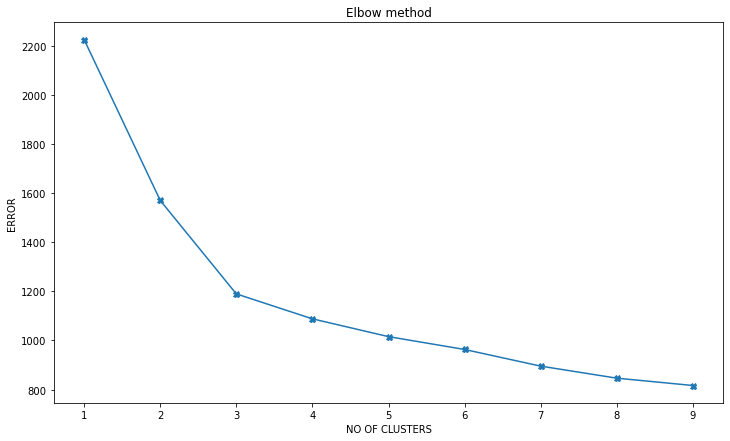

In [36]:
plt.plot(range(1,10),err,marker='X')
plt.xlabel('NO OF CLUSTERS')
plt.ylabel('ERROR')
plt.title('Elbow method')
plt.show()

In [37]:
for clusters in range(2,10):
    model  = KMeans(clusters)
    model.fit(pca10_df)
    sil_score = silhouette_score(x_scaled,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)

silhouette_score for 2 clusters: 0.26831340971052126
silhouette_score for 3 clusters: 0.2848589191898987
silhouette_score for 4 clusters: 0.24867713814255363
silhouette_score for 5 clusters: 0.2091895023371654
silhouette_score for 6 clusters: 0.15387964035603377
silhouette_score for 7 clusters: 0.20074940862302942
silhouette_score for 8 clusters: 0.13172552424175119
silhouette_score for 9 clusters: 0.16046720820521257


Inference : as observed the elbow plot and silhoutte score gives us 3 as recommended no of clusters

Kmeans model building

In [39]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca10_df)
df_pca_k = pca10_df.copy()
df_pca_k['lables_k'] = kmeans.labels_
df_pca_k.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,lables_k
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,2
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,2
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,2
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,2
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,2


AgglomerativeClustering

best Linkage evaluation

In [40]:
link=['single','complete','average','ward','centroid']
for l in link:
    Z = linkage(pca10_df, method = l)
    c, coph_dist = cophenet(Z, pdist(pca10_df))
    print('Cophenetic value for ', l , 'is: ', c)
#as we ahve seen the Cophenetic score for avearge linkage method is high, 
#so we can consider for model building

Cophenetic value for  single is:  0.5345700312034862
Cophenetic value for  complete is:  0.6598435871258331
Cophenetic value for  average is:  0.7614811925889802
Cophenetic value for  ward is:  0.6636810915961219
Cophenetic value for  centroid is:  0.7603615715748211


complete linkage dendogram

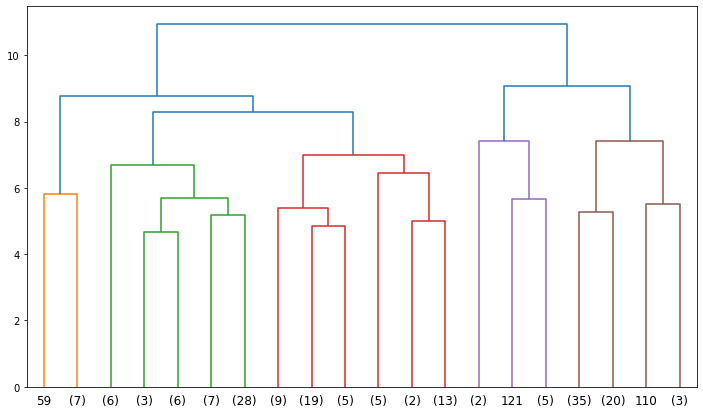

In [41]:
plt.figure(figsize=(12,7))
z_complete = linkage(pca10_df,method='complete')
dendrogram(z_complete,truncate_mode='lastp',p=20)
plt.show()

average linkage

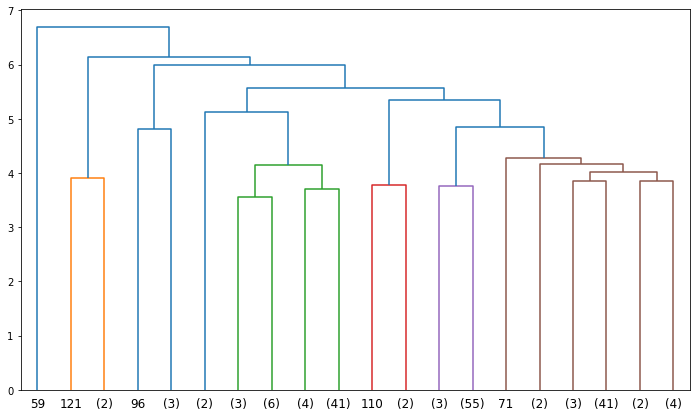

In [42]:
plt.figure(figsize=(12,7))
z_average = linkage(pca10_df,method='average')
dendrogram(z_average,truncate_mode='lastp',p=20)
plt.show()

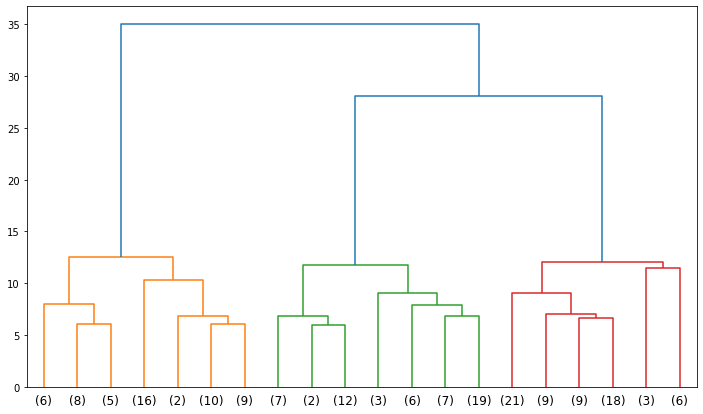

In [43]:
plt.figure(figsize=(12,7))
z_ward = linkage(pca10_df,method='ward')
dendrogram(z_ward,truncate_mode='lastp',p=20)
plt.show()

In [44]:
agg = AgglomerativeClustering(n_clusters=3,linkage='ward')
agg.fit(pca10_df)
labels_h = agg.labels_

In [45]:
df_pca_h = pca10_df.copy()
df_pca_h['Lables_h'] = labels_h
df_pca_h.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,Lables_h
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,1


In [46]:
#original pca
pca10_df.head(2)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.22388,0.596427,0.065139,0.641443,1.020956
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.92712,0.053776,1.024416,-0.308847,0.159701


In [47]:
#kmeans pca
df_pca_k.head(2)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,lables_k
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.22388,0.596427,0.065139,0.641443,1.020956,2
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.92712,0.053776,1.024416,-0.308847,0.159701,2


AgglomerativeClustering pca dataframe

In [48]:
df_pca_h.head(2)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,Lables_h
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.22388,0.596427,0.065139,0.641443,1.020956,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.92712,0.053776,1.024416,-0.308847,0.159701,1


lets view separation by scatter plot

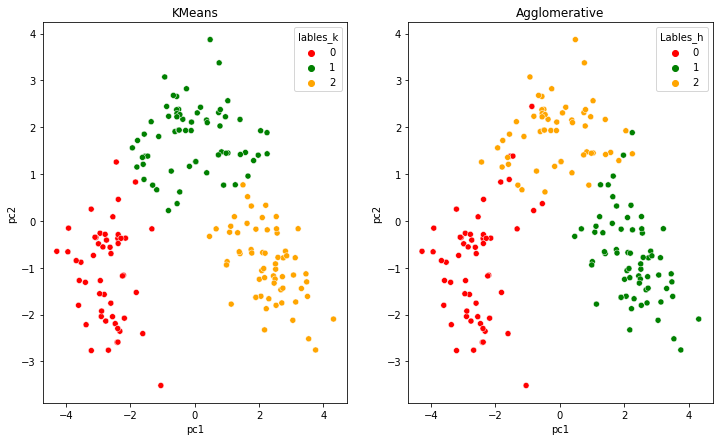

In [50]:
plt.rcParams['figure.figsize'] = (12,7)
plt.subplot(1,2,1)
plt.title('KMeans')
sns.scatterplot(x='pc1',y='pc2',hue='lables_k',data=df_pca_k,palette=['red','green','orange'])
plt.subplot(1,2,2)
plt.title('Agglomerative')
sns.scatterplot(x='pc1',y='pc2',hue='Lables_h',data=df_pca_h,palette=['red','green','orange'])
plt.show()

In [51]:
x = df_pca_k.drop('lables_k',axis=1)
y = df_pca_k.lables_k
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [52]:
dt = DecisionTreeClassifier(random_state=100)
model_pca_k = dt.fit(x_train,y_train)
ypred_pca_k = model_pca_k.predict(x_test)
print('accuracy_score of the model is ',round(accuracy_score(y_test,ypred_pca_k),2))
print('classification_report of the model is')
print(classification_report(y_test,ypred_pca_k))

accuracy_score of the model is  0.92
classification_report of the model is
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.93      0.88      0.90        16
           2       0.91      1.00      0.95        10

    accuracy                           0.92        36
   macro avg       0.91      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



In [53]:
x = df_pca_h.drop('Lables_h',axis=1)
y = df_pca_h.Lables_h
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [54]:
dt = DecisionTreeClassifier(random_state=100)
model_agg = dt.fit(x_train,y_train)
ypred_pca_h = model_agg.predict(x_test)
print('accuracy_score of the model is ',round(accuracy_score(y_test,ypred_pca_h),2))
print('classification_report of the model is')
print(classification_report(y_test,ypred_pca_h))

accuracy_score of the model is  0.78
classification_report of the model is
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       1.00      0.77      0.87        13
           2       0.67      0.80      0.73        10

    accuracy                           0.78        36
   macro avg       0.79      0.78      0.78        36
weighted avg       0.80      0.78      0.78        36



##  PCA data separated optimize performance by Kmeans

Bagging with kmeans pca data

In [55]:
x = df_pca_k.drop('lables_k',axis=1)
y = df_pca_k.lables_k
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [56]:
rf = RandomForestClassifier(random_state=2)
model_rf = rf.fit(x_train,y_train)
ypred_k_rf = model_rf.predict(x_test)
print('accuracy_score of the model is ',round(accuracy_score(y_test,ypred_k_rf),2))
print('classification_report of the model is')
print(classification_report(y_test,ypred_k_rf))

accuracy_score of the model is  0.92
classification_report of the model is
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.93      0.88      0.90        16
           2       0.91      1.00      0.95        10

    accuracy                           0.92        36
   macro avg       0.91      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



AdaBoostClassifier with Kmeans PCA data

In [57]:
x = df_pca_k.drop('lables_k',axis=1)
y = df_pca_k.lables_k
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [58]:
ada = AdaBoostClassifier(n_estimators=50,random_state=100)
model_ada = ada.fit(x_train,y_train)
ypred_k_ada = model_ada.predict(x_test)
print('accuracy_score of the model is ',round(accuracy_score(y_test,ypred_k_ada),2))
print('classification_report of the model is')
print(classification_report(y_test,ypred_k_ada))

accuracy_score of the model is  0.94
classification_report of the model is
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.94      0.94      0.94        16
           2       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



GradientBoostClassifier with Kmeans PCA data

In [59]:
x = df_pca_k.drop('lables_k',axis=1)
y = df_pca_k.lables_k
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [60]:
gb = GradientBoostingClassifier(n_estimators=50,random_state=100)
model_gb = gb.fit(x_train,y_train)
ypred_k_gb = model_gb.predict(x_test)
print('accuracy_score of the model is ',round(accuracy_score(y_test,ypred_k_gb),2))
print('classification_report of the model is')
print(classification_report(y_test,ypred_k_gb))

accuracy_score of the model is  0.94
classification_report of the model is
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.88      0.93        16
           2       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.94      0.96      0.95        36
weighted avg       0.95      0.94      0.94        36



## Logistic Regression

Logistic regrssion with out PCA

In [61]:
x = df_k.drop('lables_k',axis=1)
y = df_k.lables_k
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
lr = LogisticRegression()
model_lr = lr.fit(x_train,y_train)
ypred_k_lr = model_lr.predict(x_test)
print('accuracy_score of the model is without PCA ',round(accuracy_score(y_test,ypred_k_lr),2))
print('classification_report of the model is')
print(classification_report(y_test,ypred_k_lr))

accuracy_score of the model is without PCA  0.97
classification_report of the model is
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



Logistic regrssion with PCA

In [62]:
x = df_pca_k.drop('lables_k',axis=1)
y = df_pca_k.lables_k
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
lr = LogisticRegression()
model_lr_pca = lr.fit(x_train,y_train)
ypred_pca_k_lr = model_lr_pca.predict(x_test)
print('accuracy_score of the model is with PCA ',round(accuracy_score(y_test,ypred_pca_k_lr),2))
print('classification_report of the model is')
print(classification_report(y_test,ypred_pca_k_lr))

accuracy_score of the model is with PCA  0.97
classification_report of the model is
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

